<a href="https://colab.research.google.com/github/SupriyaJagtap56/MachineLearningProg/blob/main/ML_Practical1_HousingDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Session 1 (Housing Dataset)


In [ ]:
import pandas as pd


In [ ]:
house=pd.read_csv('/content/sample_data/Housing.csv')


In [ ]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
house["area"].value_counts()

6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: area, Length: 284, dtype: int64

In [ ]:
house.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


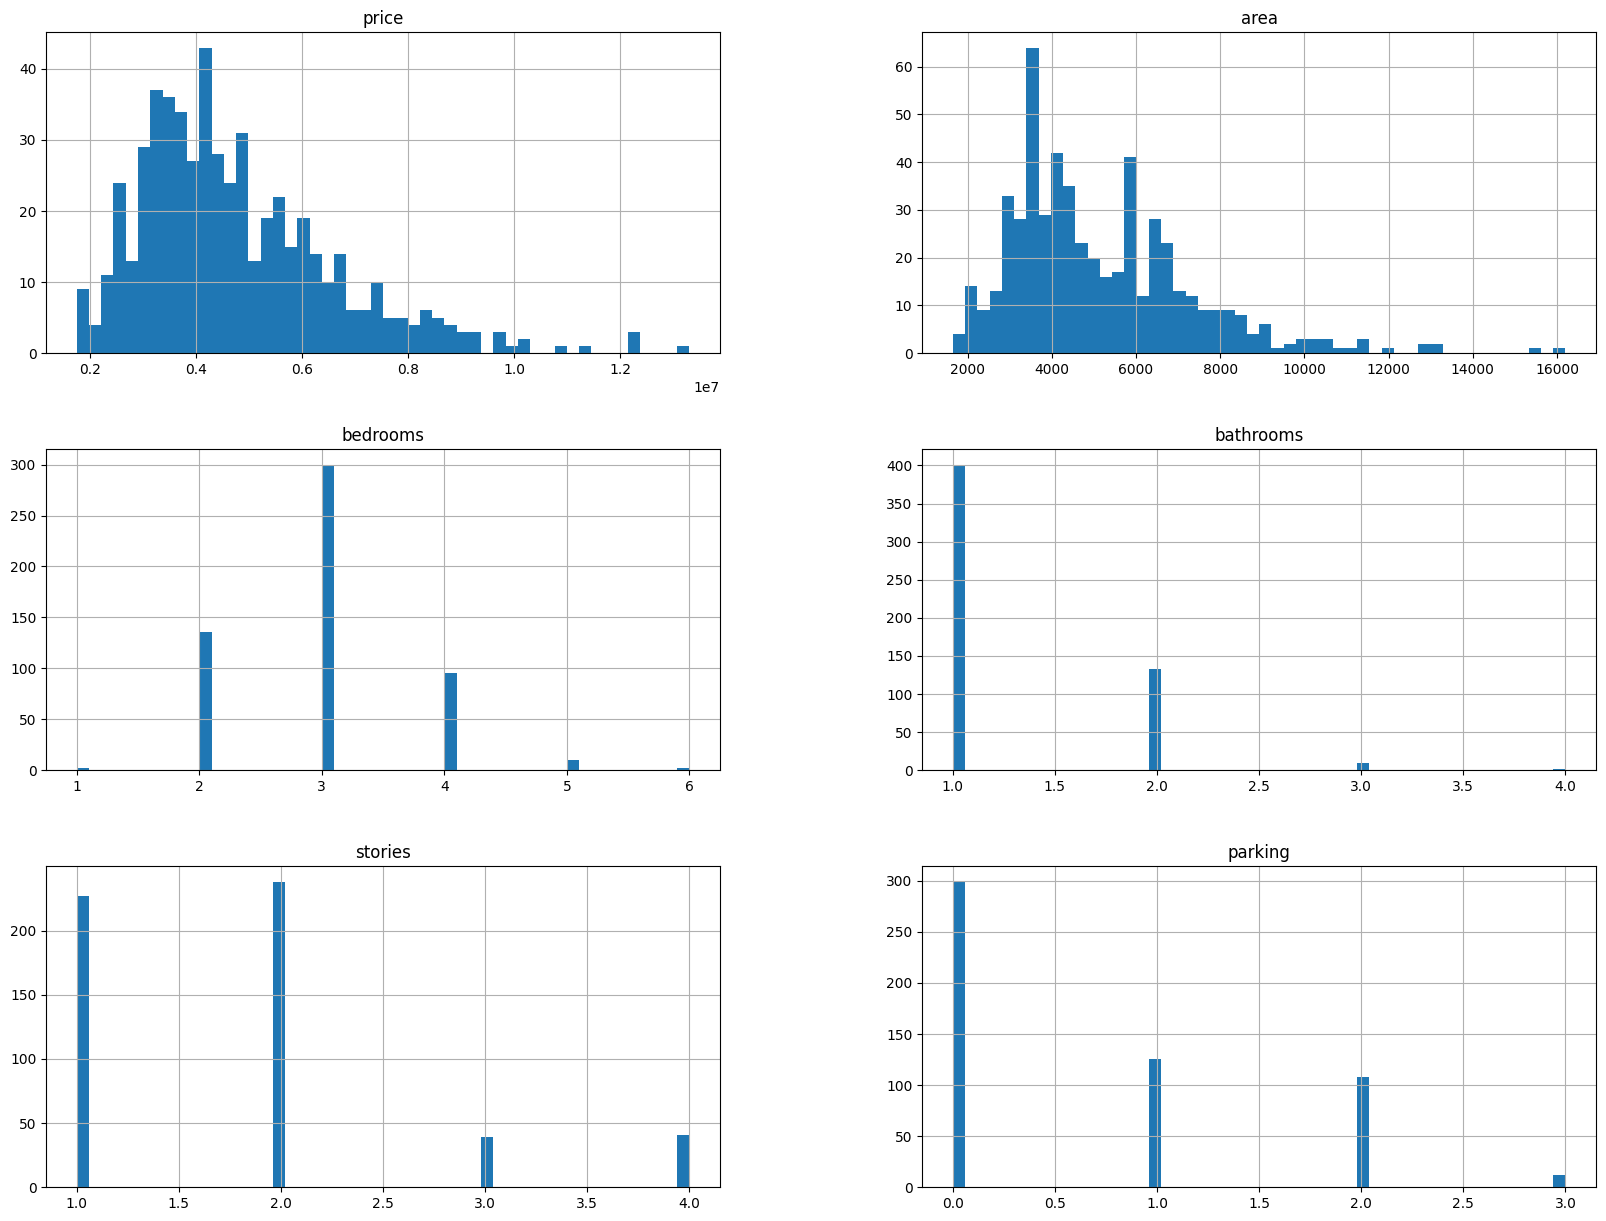

In [ ]:
import matplotlib.pyplot as plt
house.hist(bins=50, figsize=(20,15))
plt.show()

Splitting the housing dataset into training and testing dataset

In [ ]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(house, 0.2)

In [ ]:
len(train_set)

436

In [ ]:
len(test_set)

109

In [ ]:
len(house)

545

Another way of splitting dataset using function

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house, test_size=0.2, random_state=42 )

In [ ]:
X= house['area']
Y=house['price']

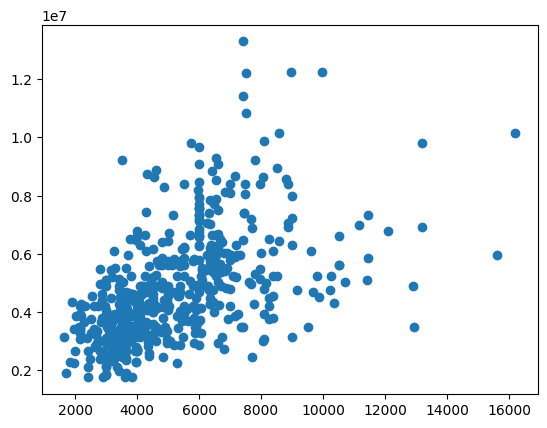

In [ ]:
plt.scatter(X,Y)
plt.show()

In [ ]:
train_set.shape

(436, 13)

In [ ]:
test_set.shape

(109, 13)

2nd way of plotting scatterplots

<Axes: xlabel='area', ylabel='price'>

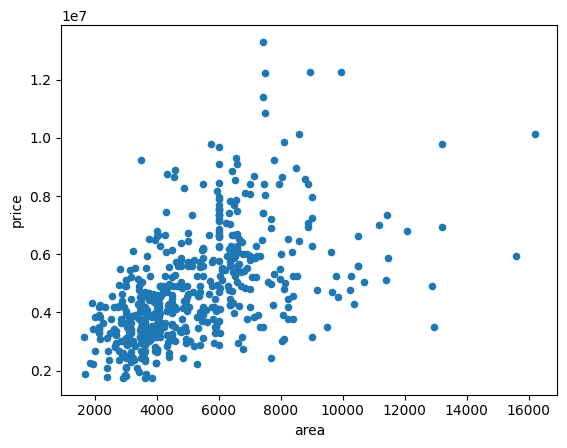

In [ ]:
house.plot(kind="scatter", x="area", y="price")

Drawing Histogram

<AxesSubplot:>

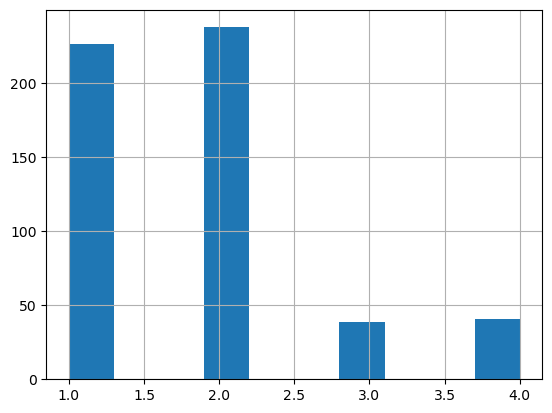

In [ ]:
house['stories'].hist()

In [ ]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [ ]:
housing_with_id = house.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house, test_size=0.2, random_state=42 )

In [ ]:
train_set.shape

(436, 13)

Correlation Matrix

In [ ]:
corr_matrix = house.corr()

In [ ]:
corr_matrix["area"].sort_values(ascending=False)

area         1.000000
price        0.535997
parking      0.352980
bathrooms    0.193820
bedrooms     0.151858
stories      0.083996
Name: area, dtype: float64

Scatter Matrix

array([[<AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='price', ylabel='area'>,
        <AxesSubplot:xlabel='parking', ylabel='area'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='area'>],
       [<AxesSubplot:xlabel='area', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='parking', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>],
       [<AxesSubplot:xlabel='area', ylabel='parking'>,
        <AxesSubplot:xlabel='price', ylabel='parking'>,
        <AxesSubplot:xlabel='parking', ylabel='parking'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='parking'>],
       [<AxesSubplot:xlabel='area', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='price', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='parking', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>]],
      dtype=object)

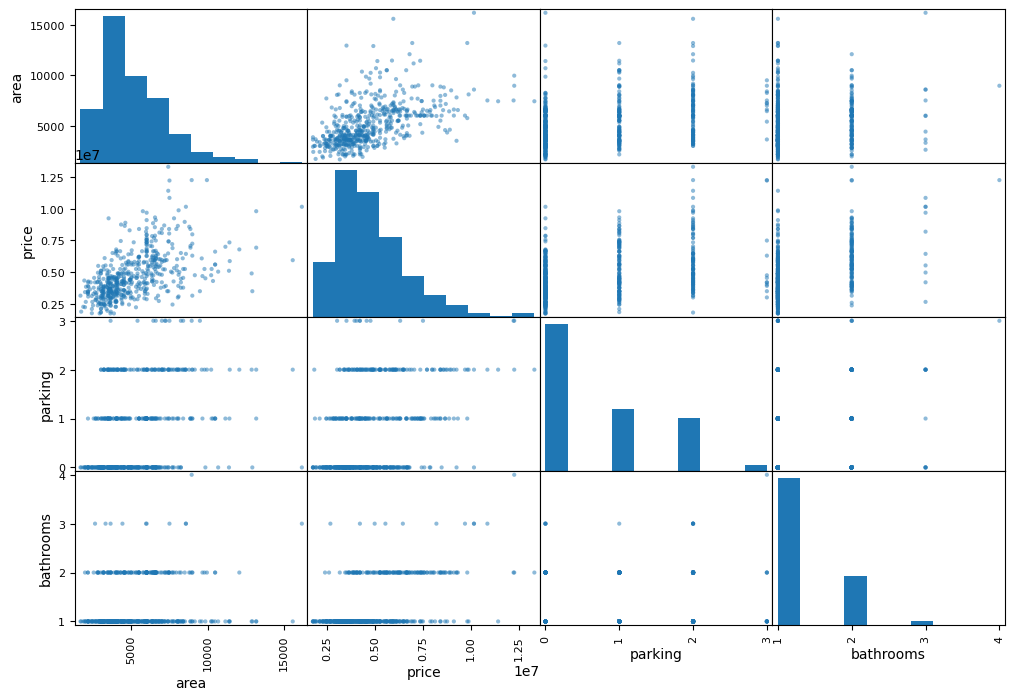

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["area", "price", "parking", "bathrooms"]
scatter_matrix(house[attributes], figsize=(12, 8))

In [ ]:
median = house["bedrooms"].median() # option 3
house["bedrooms"].fillna(median, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")